<a href="https://colab.research.google.com/github/sanaaria/Master-thesis/blob/main/KGE_NFM_%26_NFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
################################
#This script provide a demo of KGE_NFM & NFM, the runtime on one fold mainly takes 40~50 minutes.


In [2]:
#  !pip uninstall ampligraph

In [3]:
# pip install rdflib==7.0.0

In [4]:
# pip install scipy==1.10.0

In [5]:
# pip install tensorflow==1.13.1

In [6]:
# pip install tensorflow==2.13

In [7]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [8]:
# pip install torch==1.5.0 torchvision==0.6.0

ERROR: Could not find a version that satisfies the requirement torch==1.5.0 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2)
ERROR: No matching distribution found for torch==1.5.0


In [9]:
pip install scikit-learn==0.24.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 22.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [10]:
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [11]:
# pip install deepctr

In [12]:
pip install ampligraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.0/204.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.5/575.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.6 MB/s

In [13]:
pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: ampligraph, bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [14]:
import ampligraph as ampligraph

In [15]:
print(ampligraph.__version__)

2.0.1


In [16]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import pandas as pd
import ampligraph as ampligraph
from ampligraph.datasets import load_from_csv

In [17]:
# from ampligraph.evaluation import train_test_split_no_unseen,generate_corruptions_for_fit
# # from ampligraph.evaluation import train_test_split_no_unseen
from ampligraph.datasets import load_from_csv


In [18]:
# from ampligraph.evaluation import evaluate_performance
# As of version 1.1.1, Ampligraph removed the 'evaluate_performance' function and instead introduced the 'mrr_score', 'hits_at_k', and 'mean_rank' functions to calculate metrics for evaluating model performance.
# If you are using version 2.0.1, you should be able to use the 'mrr_score', 'hits_at_k', and 'mean_rank' functions to calculate the desired metrics. Here's an example of how you can do this
from ampligraph.evaluation import mrr_score

In [19]:
from ampligraph.evaluation import mrr_score, hits_at_n_score ,mr_score

In [20]:
# from ampligraph.evaluation.common import generate_corruptions
from ampligraph.latent_features.layers.corruption_generation import CorruptionGenerationLayerTrain

In [21]:
# from ampligraph import ComplEx,TransE,DistMult

In [22]:
from ampligraph.latent_features.layers.scoring import ComplEx

In [23]:
from ampligraph.latent_features.layers.scoring import TransE

In [24]:
from ampligraph.latent_features.layers.scoring import DistMult

In [25]:
# from ampligraph.evaluation import evaluate_performance

In [26]:
# from ampligraph.utils import save_model,restore_model
from ampligraph.utils import save_model
from ampligraph.utils import restore_model

In [27]:
# import deepctr

In [28]:
from tensorflow.python.keras.models import Model

In [29]:
from tensorflow.python.keras.layers import Dense, Dropout

In [30]:
# print(deepctr.__version__)

In [31]:
from keras.layers import LSTM, Lambda, Layer, Dropout

In [32]:
# from tensorflow.python.keras.layers import LSTM, Lambda, Layer, Dropout

In [33]:
# import tf.keras.layers.LSTM

In [34]:
# NFM stands for Neural Factorization Machine, which is a type of neural network designed for recommendation systems.
# from deepctr.models import NFM

In [35]:
# from deepctr.feature_column import SparseFeat,DenseFeat,get_feature_names

In [36]:
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam,Adagrad,Adamax


In [37]:
from tensorflow import keras

In [38]:
#load data
################################################################

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
#data example: yamanishi_08
dt_08 = pd.read_csv('/content/drive/MyDrive/data/yamanishi_08/dt_all_08.txt',delimiter='\t',header=None)
# the script reads a csv file using pandas' read_csv function. This function reads the file from the specified path, which in this case is
# /content/drive/MyDrive/data/yamanishi_08/dt_all_08.txt.

dt_08.columns = ['head','relation','tail']
# the columns of the DataFrame dt_08 are set using the columns attribute. The column names are 'head', 'relation', and 'tail'.

In [40]:
#kg
# ##This code is written in Python using the pandas library.
# #The goal of this code is to load two text files,
# which contain Knowledge Graph (KG) data, and concatenate them into a single pandas DataFrame.
# The KG data in these text files consists of triples (head, relation, tail), which are essentially edges in a graph.
# The 'head' is the subject, the 'relation' is the predicate, and the 'tail' is the object.

kg1 = pd.read_csv('/content/drive/MyDrive/data/yamanishi_08/kg_data/kegg_kg.txt',delimiter='\t',header=None)
# The pd.read_csv() function reads the specified file and creates a DataFrame. The delimiter='\t' argument tells pandas to use tabs as separators.
# The header=None argument tells pandas that the first row of the file does not contain column names.

kg2 = pd.read_csv('/content/drive/MyDrive/data/yamanishi_08/kg_data/yamanishi_uniprot_kg.txt',delimiter='\t',header=None)
#This code is similar to the previous one.

kg = pd.concat([kg1,kg2])
#Concatenate the two DataFrames.
#The pd.concat() function concatenates the input DataFrames into a single DataFrame.

kg.index = range(len(kg))
#Reset the index of the concatenated DataFrame.
#The index attribute of a DataFrame represents the index of the rows.
#This line of code resets the index of the concatenated DataFrame so that it starts from 0 and increments by 1.

kg.columns = ['head','relation','tail']
#Set the column names of the concatenated DataFrame.
#This line of code assigns new column names to the concatenated DataFrame.


#The resulting kg DataFrame contains the combined KG data from both text files.
# The DataFrame has three columns: 'head', 'relation', and 'tail'. The rows represent the triples (head, relation, tail) in the KG.

In [41]:
print(kg)

           head               relation        tail
0        D00183       DRUG_PATHWAY_MAP    map07014
1      hsa05200           PATHWAY_GENE    hsa:2002
2       hsa:223               GENE_EC3  ec:1.2.1._
3      map07048  PATHWAY_COMPOUND_DRUG      D00809
4      hsa04614           PATHWAY_DRUG      D01119
...         ...                    ...         ...
95667  hsa:5800          INTERACT_WITH    hsa:7010
95668  hsa:5777          INTERACT_WITH    hsa:3932
95669  hsa:5777          INTERACT_WITH    hsa:5747
95670  hsa:5777          INTERACT_WITH    hsa:6098
95671  hsa:5091          INTERACT_WITH      Q03463

[95672 rows x 3 columns]


In [42]:
kg.shape

(95672, 3)

In [43]:
kg1.shape

(59222, 3)

In [44]:
kg2.shape

(36450, 3)

In [45]:
print(59222+36450)

95672


In [46]:
##This code is a preprocessing step for the neural feature matrix (NFM) used in recommendation systems.
#It performs label encoding and min-max scaling on the categorical data in the input dataframe.
#for nfm input
# The first two lines create two LabelEncoder objects.
# These are used to convert categorical variables into a numerical format that can be understood by machine learning algorithms.
# The LabelEncoder() function is called twice to create two objects, head_le and tail_le.
head_le = LabelEncoder()
tail_le = LabelEncoder()

# The fit() method is called on both objects. This method calculates the necessary parameters to perform the encoding.
head_le.fit(dt_08['head'].values)
tail_le.fit(dt_08['tail'].values)

# The MinMaxScaler is imported from the preprocessing module of the sklearn library. This is used to scale the data.
mms = MinMaxScaler(feature_range=(0,1))


In [47]:
print(dt_08)

        head     relation       tail
0     D00002  DRUG_TARGET     hsa:10
1     D00448  DRUG_TARGET     hsa:10
2     D00037  DRUG_TARGET    hsa:100
3     D00155  DRUG_TARGET    hsa:100
4     D00021  DRUG_TARGET  hsa:10056
...      ...          ...        ...
5122  D00143  DRUG_TARGET   hsa:8856
5123  D00211  DRUG_TARGET   hsa:8856
5124  D00730  DRUG_TARGET   hsa:8856
5125  D00506  DRUG_TARGET   hsa:9970
5126  D00163  DRUG_TARGET   hsa:9971

[5127 rows x 3 columns]


In [48]:
print(head_le)

LabelEncoder()


In [49]:

###descriptors preparation

#The drug id and sequence are read from the respective CSV files and stored in a DataFrame called fp_id.
fp_id = pd.read_csv('/content/drive/MyDrive/data/yamanishi_08/791drug_struc.csv')['drug_id']

#RThe protein id, protein id sequence, and protein sequence are read from the respective CSV files and stored in a DataFrame called df_proseq.
#The columns of this DataFrame are then renamed to 'pro_id', 'pro_ids', and 'seq'.
df_proseq = pd.read_csv('/content/drive/MyDrive/data/yamanishi_08/989proseq.csv')
df_proseq.columns = ['pro_id','pro_ids','seq']

#The pro_id, which represents the unique identifier for each protein, is extracted from the df_proseq DataFrame.
pro_id = df_proseq['pro_id']

# The drug features are read from the morganfp.txt file using the np.loadtxt() function and stored in the drug_feats variable.
drug_feats = np.loadtxt('/content/drive/MyDrive/data/yamanishi_08/morganfp.txt',delimiter=',')

#The protein features are read from the pro_ctd.txt file using the np.loadtxt() function and stored in the pro_feats variable.
pro_feats = np.loadtxt('/content/drive/MyDrive/data/yamanishi_08/pro_ctd.txt',delimiter=',')

# The protein features are then scaled using the MinMaxScaler. The scaled features are stored in the pro_feats_scaled variable.
pro_feats_scaled = mms.fit_transform(pro_feats)

#Next, PCA is applied to reduce the dimensionality of the scaled protein features to 100 components. The reduced features are stored in the pro_feats_scaled2 variable.
pro_feats_scaled2 = PCA(n_components=100).fit_transform(pro_feats_scaled)

#The reduced protein features are then scaled again using the MinMaxScaler. The scaled features are stored in the pro_feats_scaled3 variable.
pro_feats_scaled3 = mms.fit_transform(pro_feats_scaled2)

#Finally, the fp_df and prodes_df DataFrames are created by concatenating the drug id and drug features (represented by drug_feats),
#and the protein id and protein features (represented by pro_feats_scaled3), respectively.
fp_df = pd.concat([fp_id,pd.DataFrame(drug_feats)],axis=1)
prodes_df = pd.concat([pro_id,pd.DataFrame(pro_feats_scaled3)],axis=1)


In [50]:
# print(fp_id)
fp_df.head(10)

,drug_id,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,D00448,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,D00037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,D00155,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,D00021,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,D01441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,D00279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,D00043,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,D00160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,D00039,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,D00065,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
prodes_df.head(10)

,pro_id,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,hsa:10,0.492745,0.378991,0.247887,0.365602,0.362159,0.338746,0.646155,0.436877,0.531654,...,0.492017,0.601584,0.417904,0.425675,0.592996,0.408399,0.457260,0.438626,0.688754,0.000000
1,hsa:100,0.506456,0.429743,0.369211,0.339106,0.604534,0.454493,0.571485,0.464988,0.494835,...,0.395271,0.474973,0.330398,0.359915,0.512509,0.558766,0.474174,0.550298,0.511907,0.520552
2,hsa:10056,0.630732,0.457383,0.328126,0.297027,0.400041,0.434246,0.522574,0.401249,0.533447,...,0.483456,0.362159,0.366754,0.325713,0.553785,0.477632,0.513323,0.505420,0.376806,0.693254
3,hsa:1017,0.591641,0.493375,0.197547,0.456034,0.346906,0.571221,0.594414,0.437832,0.486730,...,0.322506,0.596818,0.263635,0.468745,0.837764,0.400961,0.402539,0.493352,0.507665,0.752739
4,hsa:1018,0.635572,0.494294,0.218801,0.486494,0.423561,0.509730,0.520542,0.425348,0.493557,...,0.427998,0.815488,0.057152,0.106609,0.984301,0.452878,0.901570,0.635765,0.347485,0.166801
5,hsa:10188,0.580887,0.683118,0.509173,0.292143,0.555119,0.520207,0.446041,0.451692,0.547668,...,0.458968,0.440202,0.493066,0.230446,0.435839,0.414468,0.437404,0.463290,0.442572,0.495039
6,hsa:1019,0.414452,0.366858,0.438011,0.372351,0.577573,0.395744,0.370834,0.543521,0.367073,...,0.283762,0.617893,0.503509,0.442142,0.431474,0.378769,0.417106,0.562390,0.363959,0.630620
7,hsa:1020,0.728091,0.486550,0.334128,0.549522,0.344012,0.388372,0.512808,0.476311,0.347143,...,0.435133,0.424743,0.472877,0.751366,0.563651,0.460353,0.532301,0.557606,0.549010,0.679088
8,hsa:1021,0.611166,0.495431,0.362506,0.422822,0.478290,0.401122,0.526785,0.411057,0.517399,...,0.281713,0.443160,0.252996,0.536164,0.629548,0.426170,0.458679,0.583234,0.308439,0.562610
9,hsa:1022,0.590316,0.470978,0.397042,0.398146,0.410757,0.422528,0.416759,0.312970,0.468853,...,0.335355,0.790922,0.587026,0.412889,0.312246,0.631539,0.437243,0.456430,0.577971,0.550854


In [52]:
# from matplotlib import pyplot as plt
# _df_11[3].plot(kind='line', figsize=(8, 4), title=3)
# plt.gca().spines[['top', 'right']].set_visible(False)

In [53]:
# from matplotlib import pyplot as plt
# _df_3[1].plot(kind='hist', bins=20, title=1)
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [54]:

#Function
################################################################

# If you want to test other scenarios, just change the data path.
# But it should be noted that the hypermeters in nfm need to be adjusted.
# Typiclly, the l2_reg_dnn & l2_reg_linear = 1e-5 is enough in the warm start.
# For the cold start, the l2_reg_dnn & l2_reg_linear need to be larger, like 1e-3.

data_path = '/content/drive/MyDrive/data/yamanishi_08/data_folds/warm_start_1_10'


######This function is designed to work with 10-fold cross-validation, as it assumes there are 10 different folds for the training and testing sets.
# Therefore, the input i represents the current fold. The function loads the training and testing data for this fold and returns them.
# In addition, the function merges the positive train examples and the knowledge graph into a single dataframe,
# which is used for creating the embeddings. This is why the data dataframe includes only the head, relation, and tail attributes, without the label attribute.
def load_data(i):
    # Read the train_fold csv file. The label is included.
    train = pd.read_csv(data_path+'/train_fold_'+str(i+1)+'.csv')[['head','relation','tail','label']]

    # Select only the positive examples (label == 1) from the train set.
    train_pos = train[train['label']==1]

    # Read the test_fold csv file. The label is included.
    test = pd.read_csv(data_path+'/test_fold_'+str(i+1)+'.csv')[['head','relation','tail','label']]

    # Merge the positive train examples and the knowledge graph into a single dataframe.
    data = pd.concat([train_pos,kg])[['head','relation','tail']]


    # Return the train, train_pos, test, and data dataframes.
    return train,train_pos,test,data



In [55]:
train,train_pos,test,data=load_data(0)

In [56]:
test

,head,relation,tail,label
0,D00002,DRUG_TARGET,hsa:10,1.0
1,D00107,DRUG_TARGET,hsa:1033,1.0
2,D01977,DRUG_TARGET,hsa:10461,1.0
3,D03218,DRUG_TARGET,hsa:10461,1.0
4,D04023,DRUG_TARGET,hsa:10461,1.0
...,...,...,...,...
5532,D00187,DRUG_TARGET,hsa:3758,0.0
5533,D00187,DRUG_TARGET,hsa:6338,0.0
5534,D00187,DRUG_TARGET,hsa:2877,0.0
5535,D00187,DRUG_TARGET,hsa:7155,0.0


In [57]:
columns = ['head','relation','tail']

In [58]:
test[columns]

,head,relation,tail
0,D00002,DRUG_TARGET,hsa:10
1,D00107,DRUG_TARGET,hsa:1033
2,D01977,DRUG_TARGET,hsa:10461
3,D03218,DRUG_TARGET,hsa:10461
4,D04023,DRUG_TARGET,hsa:10461
...,...,...,...
5532,D00187,DRUG_TARGET,hsa:3758
5533,D00187,DRUG_TARGET,hsa:6338
5534,D00187,DRUG_TARGET,hsa:2877
5535,D00187,DRUG_TARGET,hsa:7155


In [59]:
test['label'].values

array([1., 1., 1., ..., 0., 0., 0.])

In [60]:
data.head(10)

,head,relation,tail
0,D00448,DRUG_TARGET,hsa:10
1,D00037,DRUG_TARGET,hsa:100
2,D00155,DRUG_TARGET,hsa:100
3,D00021,DRUG_TARGET,hsa:10056
4,D02880,DRUG_TARGET,hsa:1017
5,D02880,DRUG_TARGET,hsa:1018
6,D01441,DRUG_TARGET,hsa:10188
7,D02880,DRUG_TARGET,hsa:1019
8,D02880,DRUG_TARGET,hsa:1020
9,D02880,DRUG_TARGET,hsa:1021


In [61]:
kg.head(10)

,head,relation,tail
0,D00183,DRUG_PATHWAY_MAP,map07014
1,hsa05200,PATHWAY_GENE,hsa:2002
2,hsa:223,GENE_EC3,ec:1.2.1._
3,map07048,PATHWAY_COMPOUND_DRUG,D00809
4,hsa04614,PATHWAY_DRUG,D01119
5,D01965,DRUG_ATC_C5,ATC:G04CA04
6,D00633,DRUG_GROUP,DG01467
7,D02566,DRUG_GROUP,DG01729
8,hsa04960,PATHWAY_DRUG,D05640
9,map07032,PATHWAY_COMPOUND_DRUG,D00494


In [62]:
train.head(10)

,head,relation,tail,label
0,D00448,DRUG_TARGET,hsa:10,1.0
1,D00037,DRUG_TARGET,hsa:100,1.0
2,D00155,DRUG_TARGET,hsa:100,1.0
3,D00021,DRUG_TARGET,hsa:10056,1.0
4,D02880,DRUG_TARGET,hsa:1017,1.0
5,D02880,DRUG_TARGET,hsa:1018,1.0
6,D01441,DRUG_TARGET,hsa:10188,1.0
7,D02880,DRUG_TARGET,hsa:1019,1.0
8,D02880,DRUG_TARGET,hsa:1020,1.0
9,D02880,DRUG_TARGET,hsa:1021,1.0


In [63]:
test.head(10)

,head,relation,tail,label
0,D00002,DRUG_TARGET,hsa:10,1.0
1,D00107,DRUG_TARGET,hsa:1033,1.0
2,D01977,DRUG_TARGET,hsa:10461,1.0
3,D03218,DRUG_TARGET,hsa:10461,1.0
4,D04023,DRUG_TARGET,hsa:10461,1.0
5,D02655,DRUG_TARGET,hsa:10846,1.0
6,D00542,DRUG_TARGET,hsa:10858,1.0
7,D00184,DRUG_TARGET,hsa:11221,1.0
8,D00538,DRUG_TARGET,hsa:11238,1.0
9,D00652,DRUG_TARGET,hsa:11238,1.0


In [64]:
# from matplotlib import pyplot as plt
# import seaborn as sns
# _df_0.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [65]:


####This Python function, roc_auc, computes the area under the ROC curve (AUC-ROC) for a given binary classification problem.
#It takes two parameters: y (ground truth) and pred (predicted probabilities). The function returns the AUC-ROC score.

#This line defines the function roc_auc that takes two parameters: y and pred.
def roc_auc(y,pred):

  # This line calls the roc_curve function from the metrics module (part of the Scikit-Learn library) with y and pred as parameters.
  #The roc_curve function calculates the ROC curve for the given binary classification problem, returning false positive rate (FPR), true positive rate (TPR), and thresholds.
    fpr, tpr, thresholds = metrics.roc_curve(y, pred)

    #roc_auc = metrics.auc(fpr, tpr): This line calls the auc function from the metrics module with fpr and tpr as parameters.
    #The auc function calculates the area under the ROC curve, which is the AUC-ROC score.
    roc_auc = metrics.auc(fpr, tpr)

    #return roc_auc: This line returns the computed AUC-ROC score.
    return roc_auc



In [66]:


###This Python function, named pr_auc, takes two parameters: y and pred. The purpose of this function is to calculate the area under the Precision-Recall curve (PR-AUC).
#the function assumes that the input arrays y and pred have the same length, as they represent the ground truth and predicted labels for a binary classification problem.
#The function will raise a ValueError if the lengths of the two input arrays do not match.
def pr_auc(y, pred):

    #The first line inside the function defines the variable precision, recall, and thresholds. It calculates these values using the precision_recall_curve function from the metrics module.
    precision, recall, thresholds = metrics.precision_recall_curve(y, pred)

    #The second line of the function calculates the PR-AUC score using the auc function from the metrics module. It takes the recall values and the precision values as input parameters.
    pr_auc = metrics.auc(recall, precision)

    #Finally, the function returns the PR-AUC score as output.The output of the function is a float number, representing the PR-AUC score.
    return pr_auc




In [67]:
from ampligraph.latent_features import ScoringBasedEmbeddingModel
# from ampligraph.latent_features import EmbeddingModel

In [68]:

###get_scaled_embeddings that takes a pre-trained knowledge graph embedding model and three sets of triples as input parameters.
# It outputs the scaled embeddings for the subjects and objects of the training and testing triples.
#In summary, this function first obtains the embeddings for the subject and object entities of the triples.
#Then, it concatenates these embeddings and applies normalization and dimensionality reduction techniques (MinMaxScaler and PCA)
#to obtain scaled embeddings that can be used for various downstream tasks.

#Defines the function and specifies the input parameters.
def get_scaled_embeddings(model,train_triples,test_triples,get_scaled,n_components):

    # For each triple, the function extracts the subject (head) entities and gets their embeddings from the pre-trained model. It does this for both the training and testing triples.
    # [train_sub_embeddings,test_sub_embeddings] = [model.get_embeddings(x['head'].values, embedding_type='entity') for x in [train_triples,test_triples]]
    [train_sub_embeddings,test_sub_embeddings]=[model.get_embeddings(x['head'].values, embedding_type='e')  for x in [train_triples,test_triples]]

    #Similarly, it extracts the object (tail) entities and gets their embeddings from the pre-trained model. Again, it does this for both the training and testing triples.
    [train_obj_embeddings,test_obj_embeddings] = [model.get_embeddings(x['tail'].values, embedding_type='e') for x in [train_triples,test_triples]]

    #The function concatenates the subject and object embeddings for each triple in the training set.
    train_feats = np.concatenate([train_sub_embeddings,train_obj_embeddings],axis=1)

    #The function also concatenates the subject and object embeddings for each triple in the testing set.
    test_feats = np.concatenate([test_sub_embeddings,test_obj_embeddings],axis=1)

    #The function applies the MinMaxScaler (mms) to the concatenated training features to obtain a set of normalized dense features.
    train_dense_features = mms.fit_transform(train_feats)

    #The function also applies the MinMaxScaler to the concatenated testing features to obtain a set of normalized dense features.
    test_dense_features = mms.transform(test_feats)

    #If the parameter get_scaled is True, the function proceeds to apply Principal Component Analysis (PCA) to the normalized dense features.
    if get_scaled:

        #The function creates a PCA instance with the specified number of components (n_components).
        pca = PCA(n_components=n_components)

        #The function applies PCA to the normalized training dense features.
        scaled_train_dense_features = pca.fit_transform(train_dense_features)

        #The function also applies PCA to the normalized testing dense features.
        scaled_pca_test_dense_features = pca.transform(test_dense_features)

    #If the parameter get_scaled is False, the function skips the PCA step and directly assigns the normalized dense features to the output variables.
    else:

        #Assigns the normalized training dense features to the output variable.
        scaled_train_dense_features = train_dense_features

        #Assigns the normalized testing dense features to the output variable.
        scaled_pca_test_dense_features = test_dense_features

    #Returns the scaled embeddings for the subjects and objects of the training and testing triples.
    return scaled_train_dense_features,scaled_pca_test_dense_features




In [69]:
# print(re_train_all)

In [70]:

# train_triples=[['John', 'works', 'Google'], ['Mary', 'studies', 'Harvard']]

In [71]:
# test_triples =[['Bob', 'visits', 'Tokyo']]

In [72]:
# model.get_embeddings(['John', 'Mary'], embedding_type='e')

In [73]:

#In summary, the function get_features takes a dataframe data, two dataframes fp_df and prodes_df, and a boolean variable use_pro.
#It extracts drug features from fp_df and protein features from prodes_df using the head and tail columns of data.
#Then, it concatenates the features horizontally based on the value of use_pro. The resulting feature matrix is returned as the output of the function.
#This line defines a function named get_features. It takes four parameters: data, fp_df, prodes_df, and use_pro.
def get_features(data,fp_df,prodes_df,use_pro):

    #This line performs a left join of data and fp_df on the 'head' column of data and the 'drug_id' column of fp_df.
    #The left join is done because we want to keep all records from the left table (i.e., data) and the matched records from the right table (i.e., fp_df).
    #Then, the code selects the 1025 columns (from the 5th to the 1029th column) of the resulting dataframe and converts it into a numpy array using the values attribute.
    #The result is stored in the variable drug_features.
    drug_features = pd.merge(data,fp_df,how='left',left_on='head',right_on='drug_id').iloc[:,4:1029].values

    #This line performs a similar operation as the previous one, but this time it joins data and prodes_df on the 'tail' column of data and the 'pro_id' column of prodes_df.
    #Again, the code selects the 101 columns (from the 5th to the 105th column) of the resulting dataframe and converts it into a numpy array using the values attribute.
    #The result is stored in the variable pro_features.
    pro_features = pd.merge(data,prodes_df,how='left',left_on='tail',right_on='pro_id').iloc[:,4:105].values

    #This line checks the value of the variable use_pro. If it is True, it concatenates drug_features and pro_features horizontally using the np.concatenate function.
    #If use_pro is False, it directly assigns drug_features to the variable feature.
    if use_pro:
        feature = np.concatenate([drug_features,pro_features],axis=1)
    else:
        feature = drug_features

    #This line returns the final feature matrix.
    return feature


In [74]:
train.head(3)

,head,relation,tail,label
0,D00448,DRUG_TARGET,hsa:10,1.0
1,D00037,DRUG_TARGET,hsa:100,1.0
2,D00155,DRUG_TARGET,hsa:100,1.0


In [75]:
drug_features = pd.merge(train,fp_df,how='left',left_on='head',right_on='drug_id').iloc[:,4:1029].values

In [76]:
fp_df.head(5)

,drug_id,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,D00448,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,D00037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,D00155,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,D00021,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,D01441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
data.head(5)

,head,relation,tail
0,D00448,DRUG_TARGET,hsa:10
1,D00037,DRUG_TARGET,hsa:100
2,D00155,DRUG_TARGET,hsa:100
3,D00021,DRUG_TARGET,hsa:10056
4,D02880,DRUG_TARGET,hsa:1017


In [78]:
drug_features = pd.merge(train,fp_df,how='left',left_on='head',right_on='drug_id')
drug_features

,head,relation,tail,label,drug_id,0,1,2,3,4,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,D00448,DRUG_TARGET,hsa:10,1.0,D00448,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,D00037,DRUG_TARGET,hsa:100,1.0,D00037,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,D00155,DRUG_TARGET,hsa:100,1.0,D00155,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,D00021,DRUG_TARGET,hsa:10056,1.0,D00021,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,D02880,DRUG_TARGET,hsa:1017,1.0,D02880,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44846,D00316,DRUG_TARGET,hsa:10549,0.0,D00316,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
44847,D00316,DRUG_TARGET,hsa:54576,0.0,D00316,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
44848,D00316,DRUG_TARGET,hsa:54490,0.0,D00316,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
44849,D00316,DRUG_TARGET,hsa:2260,0.0,D00316,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
columns = ['head','relation','tail']

In [80]:
x=get_features(train[columns],fp_df,prodes_df,True)

In [81]:
y=get_features(test[columns],fp_df,prodes_df,True)

In [82]:
#'DenseFeat("des",train_des.shape[1]),'des':train_des,' is used for nfm training
#In this code, the input to get_nfm_input is the raw relational entities and their features/descriptions.
#The output is the preprocessed input data that can be used as input for a Neural Factorization Machine (NFM) model.


##Define a function named get_nfm_input with the following parameters:
# re_train_all: a dataframe of training relational entities.
# re_test_all: a dataframe of testing relational entities.
# train_feats: the training features matrix.
# test_feats: the testing features matrix.
# train_des: the training description vectors.
# test_des: the testing description vectors.
# embedding_dim: the dimensionality of the embedding space.
# pca_components: the number of PCA components to retain.
def get_nfm_input(re_train_all,re_test_all,train_feats,test_feats,train_des,test_des,embedding_dim,pca_components):

    #The next line concatenates the train_feats and train_des matrices.
    train_all_feats = np.concatenate([train_feats,train_des],axis=1)

    #Similarly, the next line concatenates the test_feats and test_des matrices.
    test_all_feats = np.concatenate([test_feats,test_des],axis=1)

    #The next line applies MinMaxScaler to the concatenated training all features matrix.
    train_all_feats_scaled = mms.fit_transform(train_all_feats)

    #The next line applies MinMaxScaler to the concatenated testing all features matrix.
    test_all_feats_scaled = mms.transform(test_all_feats)

    #The next line creates a list of feature columns, where each feature column is
    #defined as either a sparse feature (with its own unique vocabulary size and embedding dimension) or a dense feature (with a specific number of features).
    feature_columns = [SparseFeat('head',re_train_all['head'].unique().shape[0],embedding_dim=embedding_dim),
                        SparseFeat('tail',re_train_all['tail'].unique().shape[0],embedding_dim=embedding_dim),
                        DenseFeat("feats",train_all_feats_scaled.shape[1]),
                        #DenseFeat("des",train_des.shape[1])
                        ]

    #The next line creates a dictionary for the training model input.
    train_model_input = {'head':head_le.transform(re_train_all['head'].values),
                    'tail':tail_le.transform(re_train_all['tail'].values),
                     'feats':train_all_feats_scaled,
                     #'des':train_des
                    }

    #The next line creates a dictionary for the testing model input
    test_model_input = {'head':head_le.transform(re_test_all['head'].values),
                    'tail':tail_le.transform(re_test_all['tail'].values),
                    'feats':test_all_feats_scaled,
                    # 'des':test_des
                    }

    #Finally, the function returns the feature_columns, train_model_input, and test_model_input.
    return feature_columns,train_model_input,test_model_input


In [83]:
def get_nfm_input(re_train_all, re_test_all, train_feats, test_feats, train_des, test_des, embedding_dim, pca_components):
    # Concatenate train_feats and train_des matrices
    train_all_feats = np.concatenate([train_feats, train_des], axis=1)
    test_all_feats = np.concatenate([test_feats, test_des], axis=1)


    train_all_feats_scaled = mms.fit_transform(train_all_feats)

    #The next line applies MinMaxScaler to the concatenated testing all features matrix.
    test_all_feats_scaled = mms.transform(test_all_feats)



    # Dummy values for vocabulary sizes
    head_unique_count = re_train_all['head'].nunique()
    tail_unique_count = re_train_all['tail'].nunique()

    # Number of features after concatenation
    num_feats = train_all_feats.shape[1]

    # Constructing feature_columns manually without deepctr
    feature_columns = [
        {'name': 'head', 'dimension': head_unique_count, 'embedding_dim': embedding_dim},
        {'name': 'tail', 'dimension': tail_unique_count, 'embedding_dim': embedding_dim},
        {'name': 'feats', 'dimension': num_feats}
        # Add more columns as needed
    ]

    # Rest of the function remains similar to the previous implementation
    # ...
    train_model_input = {'head':head_le.transform(re_train_all['head'].values),
                    'tail':tail_le.transform(re_train_all['tail'].values),
                     'feats':train_all_feats_scaled,
                     #'des':train_des
                    }
    # train_model_input=np.array(train_model_input)
    #The next line creates a dictionary for the testing model input
    test_model_input = {'head':head_le.transform(re_test_all['head'].values),
                    'tail':tail_le.transform(re_test_all['tail'].values),
                    'feats':test_all_feats_scaled,
                    # 'des':test_des
                    }
    # test_model_input=np.array(test_model_input)
    return feature_columns, train_model_input, test_model_input


In [84]:
# import tensorflow as tf
# from deepctr.feature_column import SparseFeat, DenseFeat, create_embedding_matrix
# from deepctr.models.nfm import NFM
# from sklearn.preprocessing import LabelEncoder

In [85]:

# #the hypermeters(l2_reg_dnn & l2_reg_linear) need to be adjusted in cold start scenarios, like 1e-3
# #The following code is used to train a neural factorization machine (NFM) model for a binary classification problem.

# #The function train_nfm takes in 8 parameters: feature_columns, train_model_input, train_label, test_model_input, y, and patience.
# #The output of this function is a tuple of 3 elements: roc_nfm, pr_nfm, and pred_y[:,0].
# def train_nfm(feature_columns,train_model_input,train_label,test_model_input,y,patience):
#    #The function initializes a neural factorization machine (NFM) model by calling the NFM class with the following parameters:
#    # feature_columns, feature_columns, task='binary', dnn_hidden_units=(128,128), l2_reg_dnn=1e-5, l2_reg_linear=1e-5.
#     # re_model = NFM(feature_columns,feature_columns,dnn_hidden_units=(128,128),
#     #                 l2_reg_linear=1e-5,l2_reg_dnn=1e-5,task='binary'
#     #                 )
#     re_model = NFM(feature_columns,feature_columns, feature_columns, 1,
#              dnn_hidden_units=(128,128), dnn_dropout=0.5, dnn_activation='relu', task='binary')
#     #The NFM model is then compiled using the Adam optimizer with a learning rate of 1e-3 and the binary cross-entropy loss function. The metrics to be tracked during training are precision.
#     re_model.compile('adam', "binary_crossentropy",
#                 metrics=[keras.metrics.Precision(name='precision'),], )

#     #The function defines an early stopping callback es using the EarlyStopping class.
#     #This callback will monitor the training loss and stop training if the loss has not decreased for a specified number of epochs (patience).
#     es = EarlyStopping(monitor='loss',patience=patience,min_delta=0.0001,mode='min',restore_best_weights=True)

#     #The function trains the NFM model by calling the fit method with the following parameters: train_model_input, train_label, batch_size=20000, epochs=2000, verbose=2, and callbacks=[es].
#     #The model is trained for a maximum of 2000 epochs or until the early stopping callback decides to stop the training.
#     history = re_model.fit(train_model_input, train_label,
#                         batch_size=20000, epochs=1,
#                         verbose=2,
#                         callbacks=[es]
#                         )

#     #After training, the function evaluates the model by predicting the labels for the test data.

#             # Create a list of numpy arrays
#     numpy_arrays = [np.array(values).reshape(-1, 1) for values in test_model_input.values()]

#     # Stack the numpy arrays vertically
#     final_numpy_array = np.hstack(numpy_arrays)



#     pred_y = model.predict(test_model_input, batch_size=256)
#     # pred_y = re_model.predict(final_numpy_array, batch_size=512)
#     print("re_model_summary")
#     #The function calculates the area under the ROC curve (AUC-ROC) for the test data using the roc_auc function.
#     #This metric measures the model's ability to distinguish between the positive and negative classes.
#     roc_nfm = roc_auc(y,pred_y[:,0])

#     #The function also calculates the area under the Precision-Recall curve (AUC-PR) for the test data using the pr_auc function.
#     #This metric measures the model's ability to provide relevant results when the actual relevance is considered.
#     pr_nfm = pr_auc(y,pred_y[:,0])
#     print(roc_nfm)
#     print(pr_nfm)

#     #Finally, the function returns the ROC-AUC score, the PR-AUC score, and the predicted labels for the test data.
#     return roc_nfm,pr_nfm,pred_y[:,0]


In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score, average_precision_score


In [87]:

# def train_nfm(train_model_input, train_label, test_model_input, y,i, patience):
#     # Initialize a Sequential model
#     re_model = Sequential()

#     # Add Dense layers to simulate the NFM architecture
#     re_model.add(Dense(128, activation='relu'))
#     re_model.add(Dense(128, activation='relu'))
#     re_model.add(Dense(1, activation='sigmoid'))

#     # Compile the model
#     re_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'precision'])

#     # Define EarlyStopping callback
#     es = EarlyStopping(monitor='loss', patience=patience, min_delta=0.0001, mode='min', restore_best_weights=True)

#     # Train the model
#     history = re_model.fit(train_model_input, train_label, batch_size=20000, epochs=1, verbose=2, callbacks=[es])

#     # Predict labels for test data
#     pred_y = re_model.predict(test_model_input, batch_size=256)

#     # Calculate evaluation metrics
#     roc_nfm = roc_auc_score(y, pred_y)
#     pr_nfm = average_precision_score(y, pred_y)

#     return roc_nfm, pr_nfm, pred_y[:, 0]


In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import roc_auc_score, average_precision_score
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import tensorflow as tf

def train_conv_conv_fc(train_model_input, train_label, test_model_input, test_label, patience):
    # Extract arrays from the dictionary
    train_feats = train_model_input['feats']
    test_feats = test_model_input['feats']

    # Define input shapes based on the extracted arrays
    train_input_shape = (train_feats.shape[1], 1)  # Adjust the shape according to your data
    test_input_shape = (test_feats.shape[1], 1)    # Adjust the shape according to your data

    # Initialize a Sequential model
    model = Sequential()

    # Add Convolutional layers
    model.add(Conv1D(32, 3, activation='relu', input_shape=train_input_shape))
    model.add(MaxPooling1D(2))

    model.add(Conv1D(64, 3, activation='relu'))
    model.add(MaxPooling1D(2))

    # Flatten the output before the fully connected layers
    model.add(Flatten())

    # Add fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

   # Compile the model with specified metrics
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    print("مدل کامپایل شد")
    # Train the model
    history = model.fit(train_feats, train_label, epochs=1, batch_size=32, verbose=2, validation_split=0.2)
    print("مدل فیت شد")
    # Predict labels for test data
    pred_y = model.predict(test_feats, batch_size=32)

    # Calculate evaluation metrics
    roc = roc_auc_score(test_label, pred_y)
    pr = average_precision_score(test_label, pred_y)

    return roc, pr, pred_y[:, 0]

In [89]:
import tensorflow as tf

In [90]:
from ampligraph.latent_features import ScoringBasedEmbeddingModel

In [91]:
import ampligraph.latent_features.loss_functions as lfs

In [92]:
from ampligraph.latent_features.loss_functions import get as get_loss

In [93]:
from ampligraph.latent_features.regularizers import get as get_regularizer

In [94]:
#This function is used to train a neural fused model (NFM) using the train data. The model will be trained for multiple folds and then evaluated on the test data.
#The performance metrics will be computed as Area Under the ROC Curve (AUC-ROC) and Area Under the Precision-Recall Curve (AUC-PR)
#Parameters:

# i: Integer. This parameter represents the fold number for the current iteration. It is used to separate the data into train and test folds.

# test_num_neg: Integer. This parameter represents the number of negative examples used in the test data.

# train_num_neg: Integer. This parameter represents the number of negative examples used in the train data.

# embedding_dim: Integer. This parameter represents the dimensionality of the embeddings.

# n_components: Integer. This parameter represents the number of principal components used for dimensionality reduction.

# use_pro: Boolean. This parameter represents whether to use the proline as a feature in the model.

# patience: Integer. This parameter represents the number of epochs with no improvement after which the training will be stopped
def train(i,test_num_neg,train_num_neg,embedding_dim,n_components,use_pro,patience):

    #This function loads the train and test data for the current fold.
    train,train_pos,test,data = load_data(i)

    # # This function initializes the DistMult model. DistMult is a neural network based approach to perform knowledge graph embedding.
    # model = DistMult(batches_count=10000,
    #     seed=0,
    #     epochs=50,
    #     k=400,
    #     #embedding_model_params={'corrupt_sides':'o'},
    #     optimizer='adam',
    #     optimizer_params={'lr':1e-3},
    #     loss='pairwise', #pairwise
    #     regularizer='LP',
    #     regularizer_params={'p':3, 'lambda':1e-5},
    #     verbose=True)

    # #This function trains the DistMult model on the train data. It uses early stopping to prevent overfitting.
    # model.fit(data.values, early_stopping =True,early_stopping_params=
    #             {
    #                 'x_valid': train_pos[['head','relation','tail']].values,       # validation set, here we use training set for validation
    #                 'criteria':'mrr',         # Uses mrr criteria for early stopping
    #                 'burn_in': 10,              # early stopping kicks in after 10 epochs
    #                 'check_interval':2,         # validates every 2th epoch
    #                 'stop_interval':3,           # stops if 3 successive validation checks are bad.
    #                 'x_filter': dt_08.values,          # Use filter for filtering out positives
    #                 'corrupt_side':'o'         # corrupt object (but not at once)
    #             })

      # Define the model parameters
    k = 400  # embedding dimension
    eta = 10  # number of negative samples per positive sample
    epochs = 1  # number of training epochs
    batches_count = 10000  # number of batches
    optim = tf.keras.optimizers.Adam(learning_rate=1e-3)
    loss = get_loss('pairwise', {'margin': 0.5})
    regularizer = get_regularizer('LP', {'p': 2, 'lambda': 1e-5})

    # Create the DistMult model
    model = ScoringBasedEmbeddingModel(
          k=k,
          eta=eta,
          scoring_type="DistMult",
          # optimizer="Adam",
          # loss="PairwiseMargin",
          # regularizer="LP",
          # regularizer_weight=1e-5,
          seed=42,
      )


    model.compile(optimizer=optim, loss=loss, entity_relation_regularizer=regularizer)

     ###earlystpe alakie
    checkpoint = tf.keras.callbacks.EarlyStopping(
       monitor="val_loss",
       min_delta=0,
       patience=5,
       verbose=1,
       mode='max',
       restore_best_weights=True
)
  ###
    model.fit(data.values,
              batch_size=10000,
              epochs=1 ,                  # Number of training epochs
              # # validation_freq=20,           # Epochs between successive validation
              # validation_burn_in=10,       # Epoch to start validation
              # validation_data=train_pos[['head','relation','tail']].values,   # Validation data
              # validation_filter=dt_08.values,     # Filter positives from validation corruptions
              callbacks=[checkpoint],       # Early stopping callback (more from tf.keras.callbacks are supported)
              # verbose=True                  # Enable stdout messages
              )





    #save_model(model, model_name_path = './eg_model/dismult_400_warm_1_10.pkl')
    #model = restore_model(model_name_path='./eg_model/dismult_400_warm_1_10.pkl')
    #The columns list contains the column names that correspond to the 'head', 'relation', and 'tail' entities of the triples.
    columns = ['head','relation','tail']

    #The model.predict(test[columns]) function generates a score for each triple in the test dataset. This score represents the probability of the triple being correct.
    test_score = model.predict(test[columns])

    #The test_label variable stores the true labels for the triples in the test dataset.
    test_label = test['label'].values


    #kge performance evaluation
    roc = roc_auc(test_label,test_score)
    pr = pr_auc(test_label,test_score)
    # print(roc)
    # print(pr)


    #nfm preparation
    re_train_all = train[columns]
    re_test_all = test[columns]
    train_label = train['label']

    #This function generates the embeddings for the train and test data.
    train_dense_features,test_dense_features = get_scaled_embeddings(model,re_train_all,re_test_all,False,n_components)







    #This function generates the additional features (chemical features, proline features, etc.) for the train and test data.
    train_des = get_features(re_train_all,fp_df,prodes_df,use_pro)
    test_des = get_features(re_test_all,fp_df,prodes_df,use_pro)



    #This function generates the input for the NFM model, which includes the combined features from the embeddings and additional features.
    feature_columns,train_model_input,test_model_input = get_nfm_input(re_train_all,re_test_all,
                                                                    train_dense_features,test_dense_features,
                                                                    train_des,test_des,
                                                                    embedding_dim,n_components)
    # print("Hello gov")
    # print('feature_columns:',feature_columns[:5])
    # print('train_model_input:',train_model_input)
    # print('train_label:',train_label)
    # print('test_model_input:',test_model_input(5))
    # print('test_label:',test_label(5))


    train_label = np.array(train_label)
    test_label = np.array(test_label)

    print(train_model_input["head"])
    # print("test_model_input",test_model_input)
    # print(type(test_model_input))
    # This function trains the NFM model on the train data and evaluates its performance on the test data.
    roc_nfm,pr_nfm,pred_y = train_conv_conv_fc(train_model_input,train_label,test_model_input,test_label,patience)

    #This function returns a tuple of values:

    # roc: The Area Under the ROC Curve (AUC-ROC) for the DistMult model.

    # pr: The Area Under the Precision-Recall Curve (AUC-PR) for the DistMult model.

    # roc_nfm: The Area Under the ROC Curve (AUC-ROC) for the NFM model.

    # pr_nfm: The Area Under the Precision-Recall Curve (AUC-PR) for the NFM model.

    # re_train_all: The combined train data used in the NFM model.

    # train_label: The ground truth labels for the train data.

    # re_test_all: The combined test data used in the NFM model.

    # test_label: The ground truth labels for the test data.

    # pred_y: The predicted labels for the test data.
    print("I am meymoon")
    return roc,pr,roc_nfm,pr_nfm,re_train_all,train_label,re_test_all,test_label,pred_y

In [95]:
# pip install --upgrade tensorflow

In [96]:
#train and test
#the early stopping parameter in nfm, referring patience, need to be adjusted in cold start scenarios, like 15~20
################################################################
#In summary, this code performs a 10-fold cross-validation experiment with neural collaborative filtering.
#It computes and stores the ROC, PR, ROC_s, and PR_s values for each fold in a pandas DataFrame.
#The resulting DataFrame contains the summary statistics of the metrics.

ROC = []
PR = []
ROC_s = []
PR_s = []

#For loop iterates through the 10 runs.
for i in range(5):

  # print(i) prints the current iteration of the for loop.
    print(i)

    #train() is a function that runs the experiment for a given fold (i), given number of splits (10), given number of recommendations per user (10),
    #given number of features (50), given number of embeddings (200), given whether to use attention or not (True), and given the length of the session sequence (10).
    # It returns several metrics and arrays of user and item embeddings.
    roc,pr,roc_s,pr_s,re_train_all,train_label,re_test_all,test_label,pred_y = train(i,10,10,50,200,True,10)  #stores the return values of the train() function into variables.

    #assign the ground truth labels (train_label and test_label) to the respective users in the train and test sets.
    re_train_all['label'] = train_label
    re_test_all['label'] = test_label

    #re_test_all['pred'] = pred_y stores the predicted ratings (pred_y) for each user in the test set.
    re_test_all['pred'] = pred_y

    #ROC.append(roc), PR.append(pr), ROC_s.append(roc_s), PR_s.append(pr_s) append the ROC, PR, ROC_s, and PR_s values to their respective lists for each fold.
    ROC.append(roc)
    PR.append(pr)
    ROC_s.append(roc_s)
    PR_s.append(pr_s)

#creates an empty pandas DataFrame.
stable_metrics = pd.DataFrame()

# store the ROC, PR, ROC_s, and PR_s values in the respective columns of the DataFrame.
stable_metrics['roc'] = ROC
stable_metrics['pr'] = PR
stable_metrics['roc_s'] = ROC_s
stable_metrics['pr_s'] = PR_s

#prints the summary statistics of the metrics.
stable_metrics.describe()


0
12/12 [==============================] - 19s 2s/step - loss: 45584.7852
[181  11  60 ... 115 115 115]
مدل کامپایل شد
1122/1122 - 147s - loss: 0.3813 - accuracy: 0.8706 - val_loss: 0.2003 - val_accuracy: 1.0000 - 147s/epoch - 131ms/step
مدل فیت شد
174/174 [==============================] - 4s 24ms/step
I am meymoon
1
12/12 [==============================] - 17s 1s/step - loss: 45584.7617
[  0 181  11 ... 428 428 428]
مدل کامپایل شد
1121/1121 - 157s - loss: 0.3806 - accuracy: 0.8714 - val_loss: 0.0977 - val_accuracy: 1.0000 - 157s/epoch - 140ms/step
مدل فیت شد
173/173 [==============================] - 4s 24ms/step
I am meymoon
2
12/12 [==============================] - 18s 1s/step - loss: 45584.7812
[  0 181  11 ...  47  47  47]
مدل کامپایل شد
1125/1125 - 146s - loss: 0.3754 - accuracy: 0.8712 - val_loss: 0.2235 - val_accuracy: 1.0000 - 146s/epoch - 130ms/step
مدل فیت شد
173/173 [==============================] - 4s 23ms/step
I am meymoon
3
12/12 [==============================] - 18s

,roc,pr,roc_s,pr_s
count,5.000000,5.000000,5.000000,5.000000
mean,0.553270,0.111854,0.723340,0.200667
std,0.013036,0.007308,0.020728,0.012920
min,0.530903,0.101572,0.704377,0.184912
25%,0.552523,0.110431,0.709846,0.196243
50%,0.560367,0.112360,0.713114,0.199470
75%,0.560904,0.112820,0.735700,0.202135
max,0.561655,0.122087,0.753666,0.220575


from matplotlib import pyplot as plt
_df_0['roc'].plot(kind='hist', bins=20, title='roc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['pr'].plot(kind='hist', bins=20, title='pr')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['roc_s'].plot(kind='hist', bins=20, title='roc_s')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['pr_s'].plot(kind='hist', bins=20, title='pr_s')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='roc', y='pr', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='pr', y='roc_s', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='roc_s', y='pr_s', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['roc'].plot(kind='line', figsize=(8, 4), title='roc')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['pr'].plot(kind='line', figsize=(8, 4), title='pr')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['roc_s'].plot(kind='line', figsize=(8, 4), title='roc_s')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['pr_s'].plot(kind='line', figsize=(8, 4), title='pr_s')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['roc'].plot(kind='hist', bins=20, title='roc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['pr'].plot(kind='hist', bins=20, title='pr')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['roc_s'].plot(kind='hist', bins=20, title='roc_s')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['pr_s'].plot(kind='hist', bins=20, title='pr_s')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_15.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='roc', y='pr', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='pr', y='roc_s', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='roc_s', y='pr_s', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['roc'].plot(kind='line', figsize=(8, 4), title='roc')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_20['pr'].plot(kind='line', figsize=(8, 4), title='pr')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['roc_s'].plot(kind='line', figsize=(8, 4), title='roc_s')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['pr_s'].plot(kind='line', figsize=(8, 4), title='pr_s')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='roc', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='pr', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='roc_s', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='pr_s', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

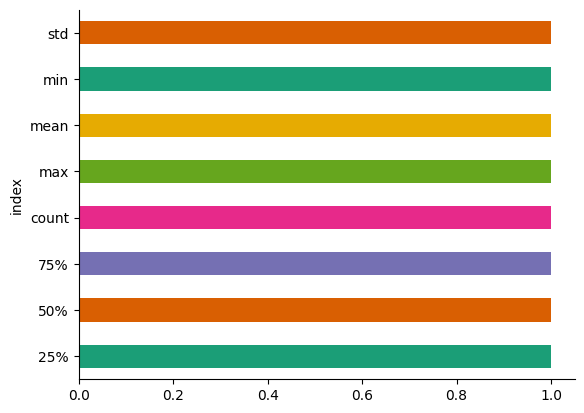

In [100]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_15.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

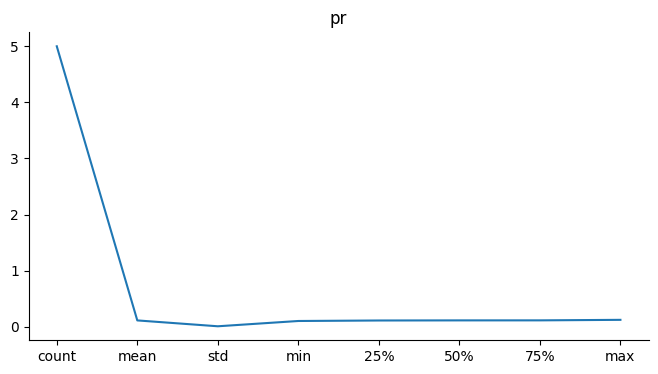

In [101]:
from matplotlib import pyplot as plt
_df_8['pr'].plot(kind='line', figsize=(8, 4), title='pr')
plt.gca().spines[['top', 'right']].set_visible(False)

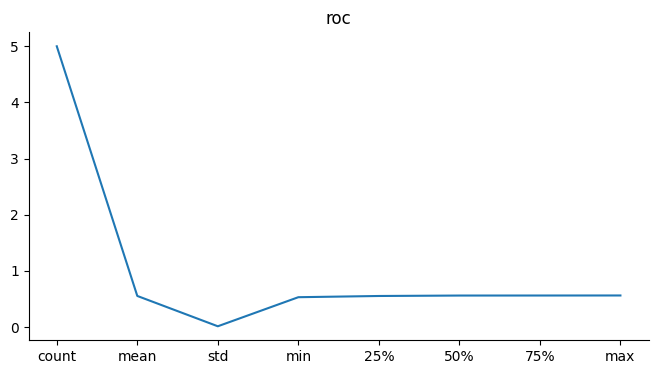

In [99]:
from matplotlib import pyplot as plt
_df_7['roc'].plot(kind='line', figsize=(8, 4), title='roc')
plt.gca().spines[['top', 'right']].set_visible(False)

In [97]:
# train, test = train_test_split(data, test_size=0.2)

# train_model_input = {name:train[name].values for name in feature_names}
# test_model_input = {name:test[name].values for name in feature_names}


# model = DeepFM(linear_feature_columns,dnn_feature_columns,task='binary')
# model.compile("adam", "binary_crossentropy",
#               metrics=['binary_crossentropy'], )

# history = model.fit(train_model_input, train[target].values,
#                     batch_size=256, epochs=10, verbose=2, validation_split=0.2, )
# pred_ans = model.predict(test_model_input, batch_size=256)

In [98]:
# import numpy as np
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# # Step 1: Make a simple dataset
# # This is a simple linear function: y = 2x + 1
# x_train = np.linspace(-10, 10, 100)
# y_train = 2 * x_train + 1

# # Reshape the input to match the input shape of a keras model
# x_train = np.expand_dims(x_train, axis=1)

# # Step 2: Make the model
# model = Sequential()
# model.add(Dense(units=1, input_shape=(1,), activation='linear'))

# # Step 3: Train the model
# model.compile(optimizer='adam', loss='mean_squared_error')
# model.fit(x_train, y_train, epochs=100, batch_size=256)

# # Step 4: Make a test dataset
# x_test = np.linspace(-15, 15, 100)
# x_test = np.expand_dims(x_test, axis=1)

# # Step 5: Use the trained model to make predictions
# pred_y = model.predict(x_test, batch_size=256)

# print("Predicted Y values:")
# print(pred_y)